# Building a Euribor Dual Curve

We build an OIS curve from OIS swaps that include forward starting OIS using MM dates.

This follows example mentioned in the Quantlib manual here https://leanpub.com/quantlibpythoncookbook

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.funding import *

####################################################################
# FINANCEPY BETA Version 0.185 - This build:  10 Nov 2020 at 23:37 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



In [3]:
valuationDate = FinDate(11, 12, 2012)

## Building the Discounting OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [4]:
depoDCCType = FinDayCountTypes.ACT_360
depos = []

spotDays = 0
settlementDate = valuationDate.addWeekDays(spotDays)
depo = FinIborDeposit(settlementDate, "1D", 0.0400/100.0, depoDCCType); depos.append(depo)

spotDays = 1
settlementDate = valuationDate.addWeekDays(spotDays)
depo = FinIborDeposit(settlementDate, "1D", 0.0400/100.0, depoDCCType); depos.append(depo)

spotDays = 2
settlementDate = valuationDate.addWeekDays(spotDays)
depo = FinIborDeposit(settlementDate, "1D", 0.0400/100.0, depoDCCType); depos.append(depo)

swaps = []
swapType = FinSwapTypes.PAY
fixedDCCType = FinDayCountTypes.ACT_365F
fixedFreqType = FinFrequencyTypes.ANNUAL

swap = FinOIS(settlementDate, "1W", swapType, 0.0700/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "2W", swapType, 0.0690/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "3W", swapType, 0.0780/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "4W", swapType, 0.0740/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

m1Date = FinDate(16,1,2013)
m2Date = FinDate(13,2,2013)
m3Date = FinDate(13,3,2013)
m4Date = FinDate(10,4,2013)
m5Date = FinDate(8,5,2013)
m6Date = FinDate(12,6,2013)

# This OIS stops at the next meeting date
swap = FinOIS(m1Date, m2Date, swapType, 0.0460/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(m2Date, m3Date, swapType, 0.0160/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(m3Date, m4Date, swapType, -0.007/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(m4Date, m5Date, swapType, -0.013/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(m5Date, m6Date, swapType, -0.014/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

# Standard OIS with standard annual terms
swap = FinOIS(settlementDate, "15M", swapType, 0.002/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "18M", swapType, 0.008/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "21M", swapType, 0.021/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "2Y", swapType, 0.036/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "3Y", swapType, 0.127/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "4Y", swapType, 0.274/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "5Y", swapType, 0.456/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "6Y", swapType, 0.647/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "7Y", swapType, 0.827/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "8Y", swapType, 0.996/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "9Y", swapType, 1.147/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "10Y", swapType, 1.280/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "11Y", swapType, 1.404/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "12Y", swapType, 1.516/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "15Y", swapType, 1.764/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "20Y", swapType, 1.939/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "25Y", swapType, 2.003/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinOIS(settlementDate, "30Y", swapType, 2.038/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

In [5]:
oisCurveFF = FinOISCurve(valuationDate, depos, [], swaps, FinInterpTypes.LINEAR_ZERO_RATES)

Let's look at the short end

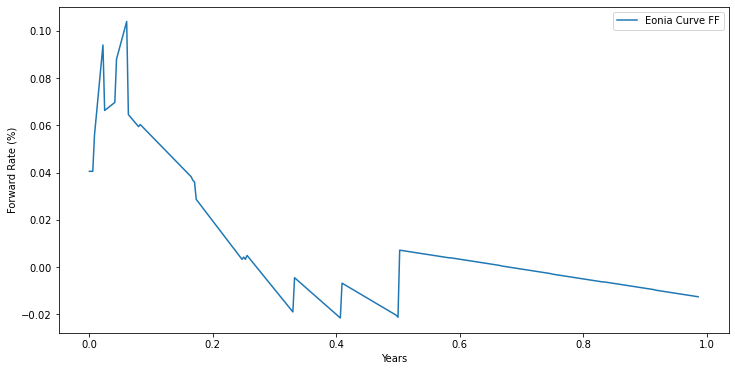

In [6]:
dayMax = 1*360
years = np.linspace(0, dayMax/365, dayMax)
dates = valuationDate.addYears(years)
oisCurveFwdsFF = oisCurveFF.fwd(dates)    

plt.figure(figsize=(12,6))
plt.plot(years, oisCurveFwdsFF*100.0, label="Eonia Curve FF")
plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.legend();

And now the entire curve.

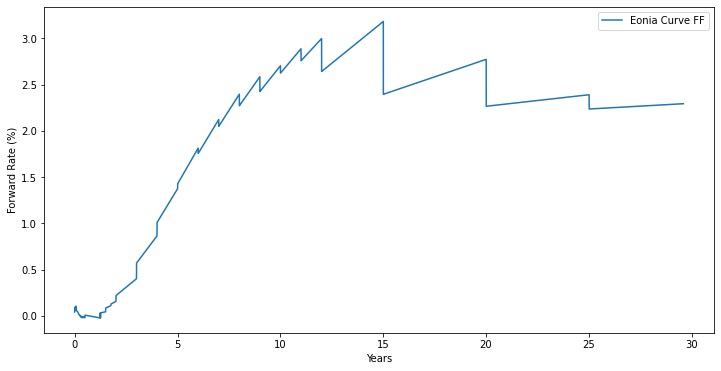

In [7]:
dayMax = 30*360
years = np.linspace(0, dayMax/365, dayMax)
dates = valuationDate.addYears(years)
oisCurveFwdsFF = oisCurveFF.fwd(dates)    

plt.figure(figsize=(12,6))
plt.plot(years, oisCurveFwdsFF*100.0, label="Eonia Curve FF")
plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.legend();

## Constructing the 6M Euribor Single Curve

We build a 6M Euribor Curve

In [8]:
depoDCCType = FinDayCountTypes.ACT_360
depos = []

spotDays = 0
settlementDate = valuationDate.addWeekDays(spotDays)
depo = FinIborDeposit(settlementDate, "6M", 0.312/100.0, depoDCCType); depos.append(depo)

# 1 x 4 FRA
notional = 1000
fras = []

fra = FinIborFRA(settlementDate.addTenor("1M"), "6M", 0.293/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("2M"), "6M", 0.272/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("3M"), "6M", 0.260/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("4M"), "6M", 0.256/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("5M"), "6M", 0.252/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("6M"), "6M", 0.248/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("7M"), "6M", 0.254/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("8M"), "6M", 0.261/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("9M"), "6M", 0.267/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("10M"), "6M", 0.279/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("11M"), "6M", 0.291/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("12M"), "6M", 0.303/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("13M"), "6M", 0.318/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("14M"), "6M", 0.335/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("15M"), "6M", 0.352/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("16M"), "6M", 0.371/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("17M"), "6M", 0.389/100.0, depoDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("18M"), "6M", 0.409/100.0, depoDCCType); fras.append(fra)

swaps = []
swapType = FinSwapTypes.PAY
fixedDCCType = FinDayCountTypes.ACT_365F
fixedFreqType = FinFrequencyTypes.ANNUAL

# Standard IRS with standard annual terms
swap = FinIborSwap(settlementDate, "3Y", swapType, 0.424/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "4Y", swapType, 0.576/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "5Y", swapType, 0.762/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "6Y", swapType, 0.954/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "7Y", swapType, 1.135/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "8Y", swapType, 1.303/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "9Y", swapType, 1.452/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "10Y", swapType, 1.584/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "12Y", swapType, 1.809/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "15Y", swapType, 2.037/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "20Y", swapType, 2.187/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "25Y", swapType, 2.234/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "30Y", swapType, 2.256/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "35Y", swapType, 2.295/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "40Y", swapType, 2.348/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "45Y", swapType, 2.421/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "50Y", swapType, 2.463/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

In [11]:
liborCurveFF = FinIborSingleCurve(valuationDate, depos, fras, swaps, FinInterpTypes.LINEAR_ZERO_RATES)

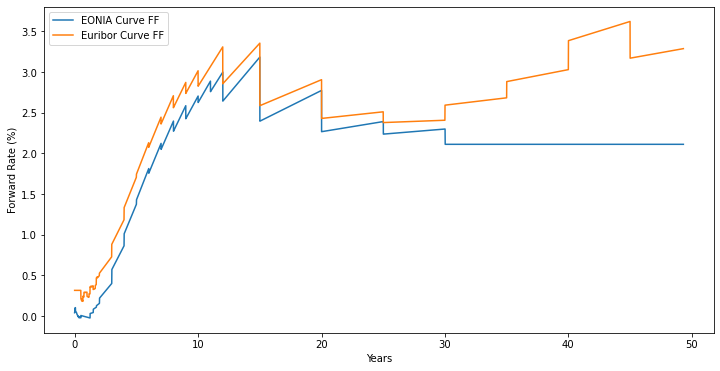

In [19]:
dayMax = 50*360
years = np.linspace(0, dayMax/365, dayMax)
dates = valuationDate.addYears(years)

oisCurveFwdsFF = oisCurveFF.fwd(dates)    
liborCurveFwdsFF = liborCurveFF.fwd(dates)    

plt.figure(figsize=(12,6))
plt.plot(years, oisCurveFwdsFF*100.0, label="EONIA Curve FF")
plt.plot(years, liborCurveFwdsFF*100.0, label="Euribor Curve FF")
plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.legend();

We can examine the detailed structure of the short term rates.

## Constructing the 6M Euribor Dual Curve


In [16]:
liborDualCurveFF = FinIborDualCurve(valuationDate, oisCurveFF, depos, fras, swaps, FinInterpTypes.LINEAR_ZERO_RATES)

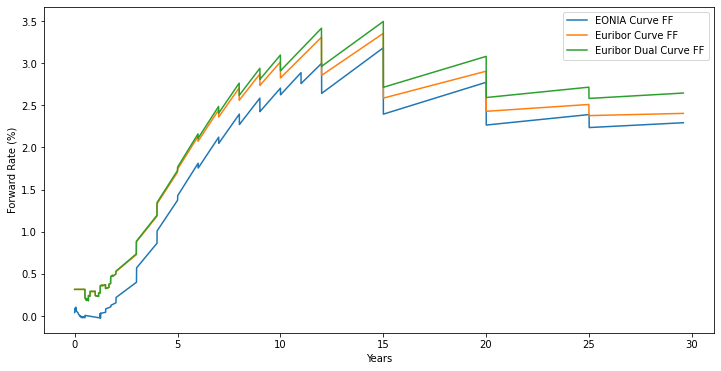

In [17]:
dayMax = 30*360
years = np.linspace(0, dayMax/365, dayMax)
dates = valuationDate.addYears(years)

oisCurveFwdsFF = oisCurveFF.fwd(dates)    
liborCurveFwdsFF = liborCurveFF.fwd(dates)    
liborDualCurveFwdsFF = liborDualCurveFF.fwd(dates)

plt.figure(figsize=(12,6))
plt.plot(years, oisCurveFwdsFF*100.0, label="EONIA Curve FF")
plt.plot(years, liborCurveFwdsFF*100.0, label="Euribor Curve FF")
plt.plot(years, liborDualCurveFwdsFF*100.0, label="Euribor Dual Curve FF")
plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.legend();

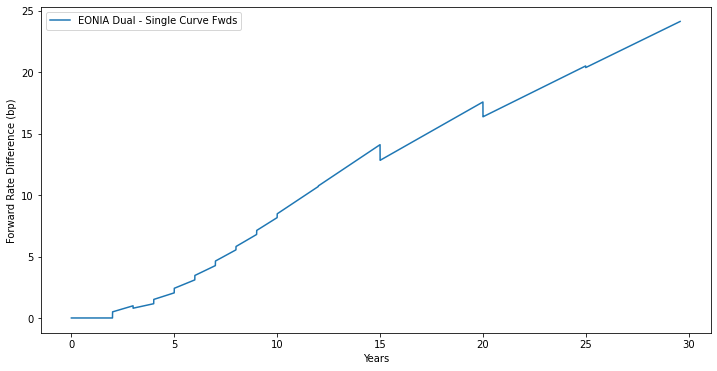

In [18]:
dayMax = 30*360
years = np.linspace(0, dayMax/365, dayMax)
dates = valuationDate.addYears(years)

liborCurveFwdsFF = liborCurveFF.fwd(dates)    
liborDualCurveFwdsFF = liborDualCurveFF.fwd(dates)

diff = liborDualCurveFwdsFF - liborCurveFwdsFF

plt.figure(figsize=(12,6))
plt.plot(years, diff*10000.0, label="EONIA Dual - Single Curve Fwds")
plt.xlabel("Years")
plt.ylabel("Forward Rate Difference (bp)")
plt.legend();

The difference is small, but not negligible.

Copyright (c) Dominic O'Kane 2020